<a href="https://colab.research.google.com/github/jfang07/sephora/blob/main/sephora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the best Sephora skincare product based on customer physical attributes

DSCI 303: Machine Learning for Data Science

Joshua Fang and Huijun Mao

## Data description
Source: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

This dataset was collected via Python scraper in March 2023 and contains:

* information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
* user reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

## Set up

In [ ]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data sets

In [ ]:
# Product information
products = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/product_info.csv')

# Reviews
reviews0_250 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_0-250.csv')
reviews250_500 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_250-500.csv')
reviews500_750 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_500-750.csv')
reviews750_1250 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_750-1250.csv')
reviews1250_end = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_1250-end.csv')

<ipython-input-3-67f4f6ece7e9>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews0_250 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_0-250.csv')
<ipython-input-3-67f4f6ece7e9>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews750_1250 = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_750-1250.csv')
<ipython-input-3-67f4f6ece7e9>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews1250_end = pd.read_csv('/content/drive/Shareddrives/DSCI 303 Project/Sephora_data/reviews_1250-end.csv')


## Data wrangling

In [ ]:
# Merge all reviews together
total_reviews = pd.concat([reviews0_250, reviews250_500, reviews500_750, reviews750_1250, reviews1250_end], ignore_index=True)

In [ ]:
# check their shape is the same
# total_reviews.shape
# reviews0_250.shape[0] + reviews250_500.shape[0] + reviews500_750.shape[0] + reviews750_1250.shape[0] + reviews1250_end.shape[0]

(1094411, 19)

In [ ]:
# Merge product information data set with reviews data set

## Data exploration

In [ ]:
# Take a look at what kinds of products are there
products['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [ ]:
products['secondary_category'].unique()

array(['Value & Gift Sets', 'Women', 'Body Moisturizers', 'Fragrance',
       'Men', 'Candles & Home Scents', 'Body Care',
       'Hair Styling & Treatments', 'Shampoo & Conditioner', 'Mini Size',
       'Lip', 'Moisturizers', 'Treatments', 'Eye Care',
       'Lip Balms & Treatments', 'Sunscreen', 'Cleansers', 'Masks',
       'Skincare', 'Face', 'Eye', 'Cheek', 'Hair', 'Tools',
       'Brushes & Applicators', 'Makeup Palettes', 'Beauty Tools',
       'Accessories', 'Makeup', 'Bath & Shower', 'Wellness',
       'High Tech Tools', 'Shop by Concern', nan, 'Self Tanners',
       'Shaving', 'Hair Tools', 'Nail', 'Beauty Accessories',
       'Beauty Supplements', 'Other Needs', 'Bath & Body'], dtype=object)

In [ ]:
products['tertiary_category'].unique()

array(['Perfume Gift Sets', 'Perfume', 'Rollerballs & Travel Size',
       'Body Lotions & Body Oils', nan, 'Cologne', 'Diffusers',
       'Deodorant & Antiperspirant', 'Candles', 'Hair Masks',
       'Leave-In Conditioner', 'Shampoo', 'Hair Oil',
       'Hair Styling Products', 'Scalp Treatments', 'Conditioner',
       'Lip Balm & Treatment', 'Moisturizers', 'Face Serums',
       'Eye Creams & Treatments', 'Face Sunscreen',
       'Face Wash & Cleansers', 'Face Oils', 'Toners', 'Face Masks',
       'Facial Peels', 'Hand Cream & Foot Cream',
       'Decollete & Neck Creams', 'Exfoliators', 'Hair Spray',
       'Hair Primers', 'Tinted Moisturizer', 'Mascara',
       'Setting Spray & Powder', 'Highlighter', 'Concealer', 'Eyebrow',
       'Blush', 'Face Sets', 'Dry Shampoo', 'Curling Irons',
       'Brushes & Combs', 'Hair Straighteners & Flat Irons',
       'Hair Dryers', 'Eyeshadow', 'Lipstick', 'Eye Palettes', 'Contour',
       'Lip Gloss', 'Eye Brushes', 'Foundation', 'False Eyelashes

In [ ]:
# Mini Size is obviously not a category, there might be something wrong here
# So we take a look
products[products['primary_category'] == "Mini Size"]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
31,P443401,Blu Mediterraneo Mini Eau de Toilette Set,5847,Acqua di Parma,7290,3.3333,12.0,5 x 0.16oz/5mL,Size,5 x 0.16oz/5mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Fresh Scent']",Mini Size,Fragrance,NaN,0,NaN,NaN
69,P398823,Amber Musk Eau de Parfum Travel Spray,7054,AERIN,11147,4.1875,48.0,0.27 oz/ 8 mL,Size + Concentration + Formulation,0.27 oz/ 8 mL Eau de Parfum Spray,...,1,0,0,"['Floral Scent', 'Layerable Scent', 'Warm &Spi...",Mini Size,Fragrance,NaN,0,NaN,NaN
142,P483644,Mini Wild Huckleberry 8-Acid Polishing Peel Mask,6312,alpyn beauty,3822,4.8500,20.0,0.5 oz / 15 mL,Size,0.5 oz / 15 mL,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Clean +...",Mini Size,Skincare,NaN,0,NaN,NaN
201,P426173,Mini Soulfood Nourishing Mask,6004,amika,47059,4.0766,235.0,3.3 oz/ 100 mL,Size,3.3 oz/ 100 mL,...,0,0,0,"['Good for: Damage', 'Vegan', 'Community Favor...",Mini Size,Hair,NaN,0,NaN,NaN
217,P426180,Mini Un.Done Volume and Matte Texture Spray,6004,amika,17210,3.9412,17.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,0,1,0,"['Vegan', 'Light Hold', 'Good for: Volume', 'C...",Mini Size,Hair,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,P504337,Donna Born In Roma Intense Eau de Parfum Trave...,1169,Valentino,8054,3.8571,7.0,0.34 oz / 10 mL,Size + Concentration + Formulation,0.34 oz / 10 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Floral Scent']",Mini Size,Fragrance,NaN,0,NaN,NaN
8051,P479491,Mini Rosso Valentino Lipstick,1169,Valentino,6894,3.5000,8.0,2 g,Color,213R Sensuous Red,...,0,0,0,"['Satin Finish', 'Hydrating', 'Matte Finish']",Mini Size,Makeup,NaN,8,25.0,25.0
8304,P474131,Mini Forbidden Fig Decorative Tin Candle,6245,VOLUSPA,3325,4.6970,33.0,4 oz/ 113 g,Size + Concentration + Formulation,4 oz/ 113 g,...,1,0,0,"['Vegan', 'Floral Scent', 'Without Phthalates'...",Mini Size,Fragrance,NaN,0,NaN,NaN
8327,P477455,Mini Decorative Tin Trio,6245,VOLUSPA,1048,2.5000,2.0,NaN,NaN,NaN,...,0,1,1,"['Vegan', 'Without Phthalates', 'Without Parab...",Mini Size,Value & Gift Sets,NaN,0,NaN,NaN


In [ ]:
# Based on my observation of other primary and secondary category,
# I tend to believe that the primary and secondary category in Mini Size is swapped
# So I want to swap back
minisize_products = products['primary_category'] == "Mini Size"
products.loc[minisize_products, 'primary_category'] = products.loc[minisize_products, 'secondary_category']
products.loc[minisize_products, 'secondary_category'] = products.loc[minisize_products, 'primary_category']

In [ ]:
# For Men, it's the same case as minisize that two columns are swapped
# So we swap back
men_products = products['primary_category'] == "Men"
products.loc[men_products, 'primary_category'] = products.loc[men_products, 'secondary_category']
products.loc[men_products, 'secondary_category'] = products.loc[men_products, 'primary_category']

In [ ]:
total_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# I want to see how many unique products are in the reviews
total_reviews['product_id'].unique().shape

(2351,)

In [ ]:
# We filter only the products that appear in the reviews
filtered_products = products[products['product_id'].isin(total_reviews['product_id'].unique())]

In [ ]:
# Only skincare products have reviews
filtered_products['primary_category'].unique()

array(['Skincare'], dtype=object)

In [ ]:
# Now we take a look at what subcategories are out there
filtered_products['secondary_category'].unique()

array(['Moisturizers', 'Treatments', 'Eye Care', 'Lip Balms & Treatments',
       'Sunscreen', 'Cleansers', 'Value & Gift Sets', 'Masks',
       'Mini Size', 'Wellness', 'High Tech Tools', 'Self Tanners',
       'Shop by Concern'], dtype=object)

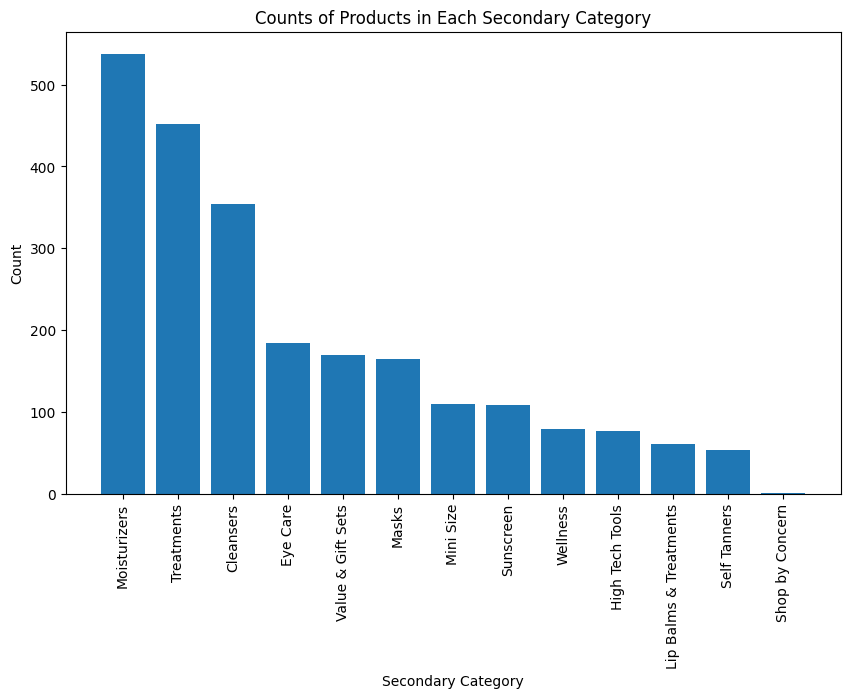

In [ ]:
# Visualize to see the counts of different items in the secondary category
category_counts = filtered_products['secondary_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts)
plt.xlabel('Secondary Category')
plt.ylabel('Count')
plt.title('Counts of Products in Each Secondary Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
filtered_products['tertiary_category'].unique()

array(['Moisturizers', 'Face Serums', 'Eye Creams & Treatments', nan,
       'Face Sunscreen', 'Face Wash & Cleansers', 'Face Oils', 'Toners',
       'Face Masks', 'Facial Peels', 'Decollete & Neck Creams',
       'Exfoliators', 'Eye Masks', 'Facial Rollers', 'Anti-Aging',
       'Face Wipes', 'Blemish & Acne Treatments', 'Night Creams',
       'Mists & Essences', 'Beauty Supplements', 'Body Sunscreen',
       'Sheet Masks', 'For Body', 'Makeup Removers', 'For Face',
       'Facial Cleansing Brushes', 'Blotting Papers', 'BB & CC Creams',
       'Holistic Wellness', 'Teeth Whitening', 'Hair Removal'],
      dtype=object)

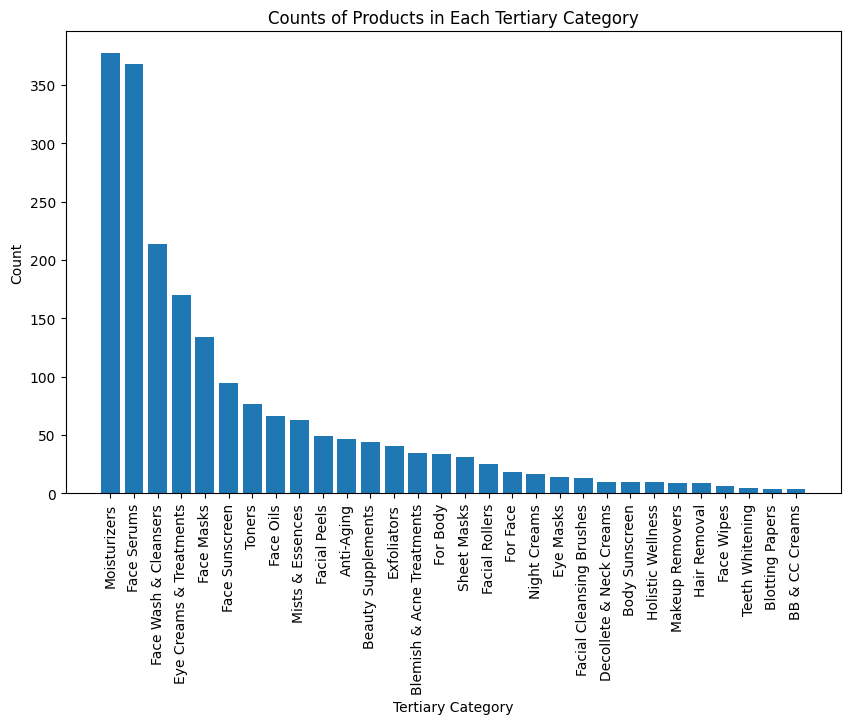

In [ ]:
tcategory_counts = filtered_products['tertiary_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(tcategory_counts.index, tcategory_counts)
plt.xlabel('Tertiary Category')
plt.ylabel('Count')
plt.title('Counts of Products in Each Tertiary Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
total_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Also how many reviews we have for each product
# Then choose the highest review one to train our model
review_products_counts = total_reviews['product_id'].value_counts()

In [ ]:
type(review_products_counts)

pandas.core.series.Series

## Information for the two dataframe

In [ ]:
filtered_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 89 to 8428
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          2351 non-null   object 
 1   product_name        2351 non-null   object 
 2   brand_id            2351 non-null   int64  
 3   brand_name          2351 non-null   object 
 4   loves_count         2351 non-null   int64  
 5   rating              2351 non-null   float64
 6   reviews             2351 non-null   float64
 7   size                2018 non-null   object 
 8   variation_type      2012 non-null   object 
 9   variation_value     1964 non-null   object 
 10  variation_desc      13 non-null     object 
 11  ingredients         2224 non-null   object 
 12  price_usd           2351 non-null   float64
 13  value_price_usd     139 non-null    float64
 14  sale_price_usd      45 non-null     float64
 15  limited_edition     2351 non-null   int64  
 16  new  

In [ ]:
total_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

## Data modeling

## Data validation